## Linear Regression

Generating some data

In [1]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [2]:
from matplotlib import pyplot as plt
plt.plot(X, y, "b.")

Computing using the normal equation

In [3]:
X_b = np.c_[np.ones((100,1)),X] #add x0  = 1 to each instance, c_ is shorthand for concat
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.03992098],
       [2.84952369]])

Making predictions

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03992098],
       [9.73896836]])

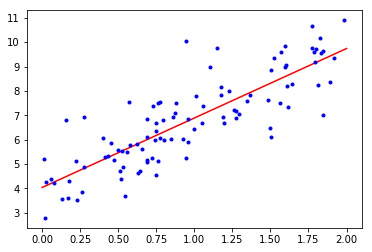

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

## Linear Regression using Scikit-Learn


In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.03992098]), array([[2.84952369]]))

In [7]:
lin_reg.predict(X_new)

array([[4.03992098],
       [9.73896836]])

## Gradient Descent

In [8]:
learning_rate = 0.1
n_iterations = 1000
m = 100 
theta = np.random.rand(2,1)
print(theta)

[[0.57621098]
 [0.46625358]]


In [9]:
for i in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-learning_rate*gradients
theta

array([[4.03992098],
       [2.84952369]])

## Polynomial Regression

In [10]:
m = 100
X = 6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1) #quadratic data + some noise
print(X.shape)
print(y.shape)
                            

(100, 1)
(100, 1)


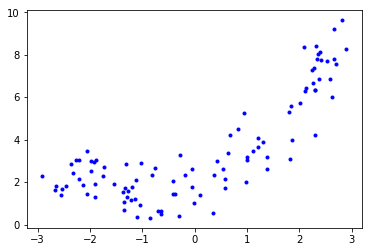

In [11]:
plt.plot(X,y,'b.')

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [13]:
X_poly[0] #X_poly now contains both degree 1 and 2 features

array([2.08586794, 4.35084507])

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.95235872]), array([[0.97381053, 0.48110835]]))

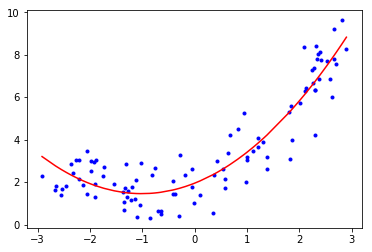

In [15]:
plt.plot(X,y,'b.')
sorted_zip = sorted(zip(X,lin_reg.predict(X_poly)))
plt.plot([sorted_zip[i][0] for i in range (len(sorted_zip))],[sorted_zip[i][1] for i in range (len(sorted_zip))],'r-' )

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


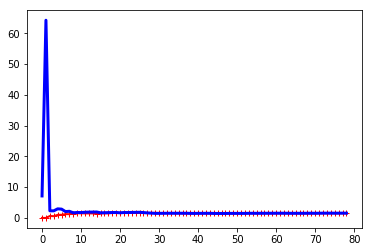

In [17]:
plot_learning_curves(lin_reg,X,y)

## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [19]:
ridge_reg.predict([[1.5]])

array([[5.05510651]])

In [20]:
#using SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Users/aish.prabhat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.25582137])

## Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.01371228])

## ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.01226067])

## Logistic Regression (with IRIS Dataset)

In [23]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [26]:
import numpy as np
X = iris['data'][:,3:] #we want only the petal width
y = (iris['target']==2).astype(np.int)

In [28]:
X.shape,y.shape

((150, 1), (150,))

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

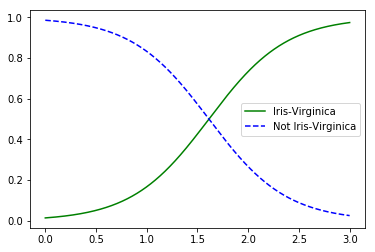

In [37]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()


## Softmax Regression

In [38]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
softmax_reg.predict([[5, 2]])

array([2])

In [40]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134076e-07, 5.75276067e-02, 9.42471760e-01]])